In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

## Loading data
- Let's take a familiar data set -- linear points
- First column is a feature X, and second column is the output Y
- Here's the challenge: *Given the X and Y mapping, can we train our model to learn the function that maps the two?*
- The only inputs are X and Y. The f(x) is to be **learnt** by our model

In [17]:
def load_data():
    return np.array([
        [-4, -6],
        [0, 2],
        [2, 6],
        [9, 20]
    ])


In [28]:
df = load_data()
dfx = df[:, 0]
dfy = df[:, 1]

In [19]:
df[:,0]

array([-4,  0,  2,  9])

## Plot the input data

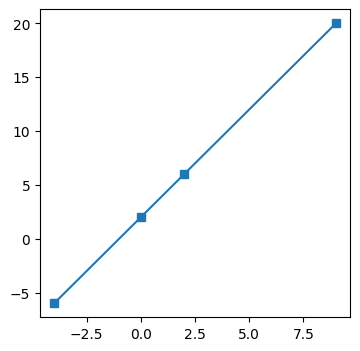

In [29]:
plt.plot(dfx, dfy, marker='s')

Nice, so we just have to implement the algorithm that can predict this linear mapping.
<p>
Specifically, the slope and offset with which the points are mapped

## Goal
The algorithm is called Linear Regression, denoted by `y = f(x) = wx + b`
- `y` is our target variable
- `x` is our input variable
- `w` and `b` are the parameters that determine the mapping function `f(x)`
<p>
That is, for the given data points:

```
[
    [-4, -6],
    [0, 2],
    [2, 6],
    [9, 20]
]
```

the algorithm will try to find the values for parameters `w` and `b` such that, when `x` is one of the above data point, the corresponding `y` is also output
<p>

Remember, the model in no way knows what values for `w` and `b` will correctly map `x` and `y`.
It's the `cost function` and `gradient descent` algorithms that will help it find the right set of parameters.
But, what are these terms?

## Cost function
Say, we randomly choose values for `w` and `b` as below:
```
w : 1
b : 1
```

In [25]:
params = [1, 1] # holds w and b in that order

So, we have a candidate mapping function of the form: `f(x) = 1 * x + 1`. Let's check how well does this mapping work. Let's calculate what `y` values does this function predict for few sample `x` values

In [45]:
def predict(x, params):
    return params[0] * x + params[1]

In [46]:
y_cap = predict(dfx, params)
print(y_cap)

[-3  1  3 10]


Observe. We used the same `x` values from our above sample data set to predict the corresponding `y` value, which we are calling as `y_cap`. Let's plot these predicted `y_cap` against the actual `y` values

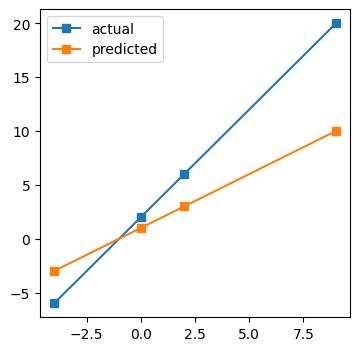

In [32]:
plt.plot(dfx, dfy, marker='s', label='actual')
plt.plot(dfx, y_cap, marker='s', label='predicted')
plt.legend()
plt.show()

The predicted values `y_cap` doesn't seem to be matching with the actual `y` values. Why? \
It's because of our `w` and `b` values!<p>
This means, our model, consisting of the `params`, is not a good one at predicting values. **But how good or bad is it?** For this, we'll define the cost function.


In [38]:
def compute_cost(dfy, y_cap):
    return np.sum(np.square(dfy - y_cap)) / (2 * np.size(dfy))

It's the mean of the square of the difference between y actual `dfy` and y predicted `y_cap`

In [39]:
cost = compute_cost(dfy, y_cap)
print(cost)

14.875


Our goal is to achieve minimum cost, which is, `0`. So, we should update our `params` to predict better, and reduce the cost. **But, how do we know which parameter to update and by what amount?** That's where we use gradient descent!

## Gradient Descent

In [47]:
def do_grad_descent(dfx, dfy, y_cap, alpha, params):
    diff = dfy - y_cap
    sz = np.size(dfy)
    w = params[0]
    b = params[1]
    dw = np.sum(np.dot(dfx, diff)) / (-1 * sz)
    db = np.sum(diff) / (-1 * sz)
    w = w - alpha * dw
    b = b - alpha * db
    new_params = [w, b]
    return new_params

Uses the calculus's differentiation to determine where the parameters have to go next. The cost function is differentiated with `w` and `b` partially, and the values of `w` and `b` are updated along with a learning rate called `alpha`. This `alpha` is not a parameter. It doesn't change during the training process and is set just once. Hence called a `hyperparameter`

In [48]:
gd_test_new_params = do_grad_descent(dfx, dfy, y_cap, 0.001, params)
print(gd_test_new_params)
new_y_cap = predict(dfx, gd_test_new_params)
print(new_y_cap)
print(compute_cost(dfy, new_y_cap))

[1.027, 1.00275]
[-3.10525  1.00275  3.05675 10.24575]
14.147774843750003


Awesome, did you see that! The cost actually reduced by approximately `0.7` units. This means, our gradient descent algorithm was successfully able to update the params `w` and `b` to the right values!

Now that we have the cost function method and gradient descent methods, let's setup the training process!

## Train

In [73]:
def train(dfx, dfy, alpha, runs, params):
    train_params = params
    train_details = []
    for i in range(runs):
        y_cap = predict(dfx, train_params)
        cost = compute_cost(dfy, y_cap)
        train_details.append({
            'cost': cost,
            'w': train_params[0],
            'b': train_params[1],
            'y_cap': y_cap
        })
        if i % 10 == 0:
            print(f'Iteration: #{i + 1}: cost = {cost}, w = {train_params[0]}, b = {train_params[1]}')
        new_params = do_grad_descent(dfx, dfy, y_cap, alpha, train_params)
        train_params = new_params
    y_cap = predict(dfx, train_params)
    cost = compute_cost(dfy, y_cap)
    train_details.append({
        'cost': cost,
        'w': train_params[0],
        'b': train_params[1],
        'y_cap': y_cap
    })
    print(f'Training complete. cost = {cost}, w = {train_params[0]}, b = {train_params[1]}')
    return [train_params, train_details]

In [74]:
train_params, train_details = train(dfx, dfy, 0.001, 100, params)

Iteration: #1: cost = 14.875, w = 1, b = 1
Iteration: #11: cost = 9.040272677705046, w = 1.2411053937385155, b = 1.0253937110321307
Iteration: #21: cost = 5.548252167433727, w = 1.4274369220551864, b = 1.0467846360363178
Iteration: #31: cost = 3.457355867872683, w = 1.57141051495993, b = 1.065064764983476
Iteration: #41: cost = 2.2044594825341957, w = 1.6826279458976576, b = 1.080924045780289
Iteration: #51: cost = 1.4527797646959533, w = 1.7685146777522351, b = 1.0948961771896935
Iteration: #61: cost = 1.0008991659261315, w = 1.8348131371237533, b = 1.107394022513932
Iteration: #71: cost = 0.7283570539506516, w = 1.8859641849515372, b = 1.1187369965581897
Iteration: #81: cost = 0.563109958390564, w = 1.9254021244698614, b = 1.129172245180126
Iteration: #91: cost = 0.46207082250538467, w = 1.955782843792528, b = 1.1388910243738655
Training complete. cost = 0.39947029435902354, w = 1.979160248574579, b = 1.1480413669434386


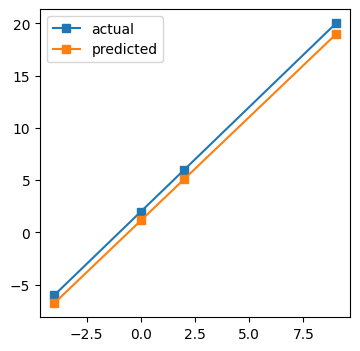

In [75]:
y_cap_new = predict(dfx, train_params)
plt.plot(dfx, dfy, marker='s', label='actual')
plt.plot(dfx, y_cap_new, marker='s', label='predicted')
plt.legend()
plt.show()

Brilliant! Our model has learnt the mapping between the input data points to a good extent! Let's see how the cost varies over the iterations

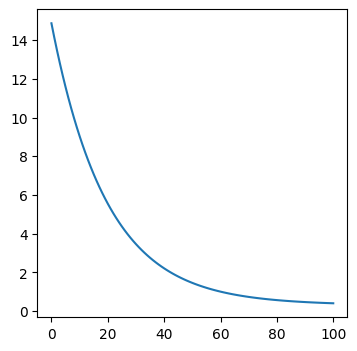

In [76]:
train_costs = [x['cost'] for x in train_details]
train_itr = np.arange(0, len(train_costs))
plt.plot(train_itr, train_costs)

Hurray! The training cost curve is decreasing as expected. Let's test for a few sample values and see how the predictions match.

## Test

[-18.64356112  16.98132336  10.05426249]


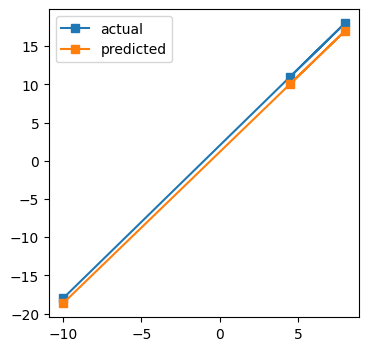

In [78]:
test_data = np.array([
    [-10, -18],
    [8, 18],
    [4.5, 11]
])

test_dfx = test_data[:, 0]
test_dfy = test_data[:, 1]
test_y_cap = predict(test_dfx, train_params)
print(test_y_cap)

plt.plot(test_dfx, test_dfy, marker='s', label='actual')
plt.plot(test_dfx, test_y_cap, marker='s', label='predicted')
plt.legend()
plt.show()

Not too bad. We can train the algorithm for a little more runs and we can clearly observe perfect matching!